## Import Liberies

In [5]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from numpy import mean
from numpy import cov
from numpy.linalg import eig

## Load mnist data online

In [58]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

## Standardize the dataset

In [61]:
X = X/255

## PCA class

In [81]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors decreasing order
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        print("Number of eignvalues {}".format(len(eigenvalues)))
        print("Eignvalues for {} components: {}".format(self.n_components, eigenvalues))
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]
        plt.plot(eigenvalues)

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)
    

Number of eignvalues 784
Eignvalues for 10 components: [ 1.21587122e-09+0.00000000e+00j  8.92673473e-10+0.00000000e+00j
  7.67181285e-10+0.00000000e+00j  6.74096204e-10+0.00000000e+00j
  6.09916180e-10+0.00000000e+00j  5.37096181e-10+0.00000000e+00j
  4.08977676e-10+0.00000000e+00j  3.60495611e-10+0.00000000e+00j
  3.44118177e-10+0.00000000e+00j  2.92192382e-10+0.00000000e+00j
  2.62818748e-10+0.00000000e+00j  2.54193811e-10+0.00000000e+00j
  2.12963849e-10+0.00000000e+00j  2.11336487e-10+0.00000000e+00j
  1.97533963e-10+0.00000000e+00j  1.85428124e-10+0.00000000e+00j
  1.64595828e-10+0.00000000e+00j  1.59562705e-10+0.00000000e+00j
  1.48117513e-10+0.00000000e+00j  1.43833971e-10+0.00000000e+00j
  1.32993195e-10+0.00000000e+00j  1.25976326e-10+0.00000000e+00j
  1.19658373e-10+0.00000000e+00j  1.13481014e-10+0.00000000e+00j
  1.10193951e-10+0.00000000e+00j  1.04646295e-10+0.00000000e+00j
  1.01030111e-10+0.00000000e+00j  9.80217953e-11+0.00000000e+00j
  9.23509989e-11+0.00000000e+00j  8

/home/satya/Desktop/notebook/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([[ 7.37304689e-06+0.j, -1.90716297e-05+0.j, -3.08369064e-06+0.j,
        ..., -1.13877186e-05+0.j, -2.16386714e-05+0.j,
        -1.22755201e-05+0.j],
       [ 6.09415084e-05+0.j, -1.74873085e-05+0.j,  3.47450525e-05+0.j,
        ...,  6.16541678e-06+0.j,  2.09790873e-06+0.j,
        -9.12258710e-06+0.j],
       [-3.55796472e-06+0.j,  2.37433533e-05+0.j, -9.76988845e-06+0.j,
        ..., -2.25728802e-05+0.j, -4.73430229e-06+0.j,
         1.16225378e-05+0.j],
       ...,
       [-1.63742158e-05+0.j,  3.55868256e-05+0.j,  2.05874886e-05+0.j,
        ...,  2.07904978e-05+0.j, -3.14736669e-06+0.j,
         4.84598889e-05+0.j],
       [-1.87092339e-05+0.j, -7.03965448e-06+0.j,  3.83394017e-05+0.j,
        ..., -8.73489085e-06+0.j,  1.71890666e-05+0.j,
         1.23671061e-05+0.j],
       [ 6.38585235e-05+0.j, -5.02928970e-06+0.j,  4.41062447e-05+0.j,
        ...,  2.54149081e-05+0.j,  8.51934599e-06+0.j,
        -4.05250112e-06+0.j]])

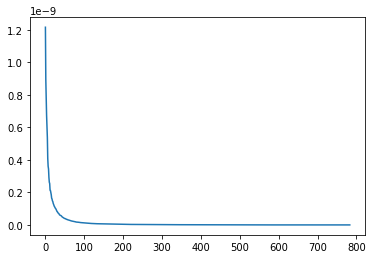

In [82]:
pca = PCA(10)
pca.fit(X)
pca.transform(X)